
<div align="left">
    <h2></h2>       
    </a>
</div>


<a name="top" id="top"></a>

<div align="center">
    <h1>Assessment of Wine Quality using Support Vector Machines</h1>
    <br>
    <i>Wroclaw University of Science and Technology</i>
    <br>
    <br>
    <i>The aim of this project is to develop a SVM model that determines the quality of wines based on physicochemical tests.<i>
    <br>
    <br>
    <i>Mehak Rohra</i> <br>
    <i>Jyoti</i> <br>
    <i>Naum Mukiti</i>
    <br>
    <br>
    <i><i>
    <br>
         <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
</div>

<center><img src=https://images.newrepublic.com/5da56c3bf66ee5214cbd361855f0c79c1d7d8611.gif></center>


# Introduction

In this notebook, we will be implementing a SVM model to classify the quality of wine. The dataset contains 1599 and 4898 samples of red and white wines respectively with which the quality and the type of wines can be predicted by analyzing the various physicochemical properties.

This notebook also serves as a concise guide to developing a Support Vector Machine (SVM) model for binary wine quality classification. We'll play with some data, train our model, and see how well it predicts wine quality. It's a quick guide, so let's get started! 🍇🤖

Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

install "ucimlrepo"

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

Fetch the dataset with ID 186 using a fetch_ucirepo

Fetch the wine quality dataset which has ID 186 from the UCI Machine Learning Repository

In [ ]:
wine_quality = fetch_ucirepo(id=186)

In [ ]:
# wine_quality.metadata

Access the variables or attributes of the wine_quality

In [ ]:
wine_quality.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


This dataset contains various features related to wine characteristics. The features include both continuous and categorical variables, representing aspects like acidity, sulfur content, and alcohol. The target variable, 'quality,' is an integer representing a score between 0 and 10. Additionally, there is a categorical variable 'color' indicating whether the wine is red or white.

In [ ]:
res_df = wine_quality.data.original

In [ ]:
res_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Data Cleaning and Pre-Processing

The dataset consists of continuous features which are represented by the physio-chemical properties and a discrete column called quality which is score between 0 and 10.
To build a binary target variable we set a threshold value for quality above which the wine is considered to be of "bad" [-1] quality otherwise "good" [+1]. This forms the basis for our classification.



In [ ]:
res_df_red = res_df[(res_df['color'] == 'red') ].copy()
threshold = 5
res_df_red['label'] = res_df_red['quality'].apply(lambda x: -1 if x > threshold else 1)

Categorize white wines in res_df_red into two groups based on their 'quality' scores: those above the threshold (5) are labeled as -1, and the rest are labeled as 1.

In [ ]:
res_df_white = res_df[(res_df['color'] == 'white')].copy()
res_df_white['label'] = res_df_white['quality'].apply(lambda x: -1 if x > threshold else 1)

Examine the res_df_red DataFrame, which contains red wine data

In [ ]:
res_df_red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,-1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,-1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,1


The 'label' column has been derived from the 'quality' column, where wines with a quality score above a threshold of 5 have been labeled as 1, and those below or equal to the threshold have been labeled as -1. This binary labeling is useful for our binary classification task, distinguishing wines into two categories, indicating "good" (-1) and "not-so-good" (+1) quality.

Examine the res_df_white DataFrame, which contains white wine data

In [ ]:
res_df_white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,label
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,-1
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,-1
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,-1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,-1
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,-1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,-1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,-1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,-1


# Feature selection and correlation matrices, pair plot

In this section, we delve into feature selection and visualization techniques to uncover meaningful patterns within the wine datasets. To kick things off, we begin by constructing correlation matrices for both red and white wines. The heatmaps generated from these matrices provide a visual representation of the relationships between different features, offering insights into potential correlations and dependencies.

<ipython-input-13-774a5988bd3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = res_df_red.corr()


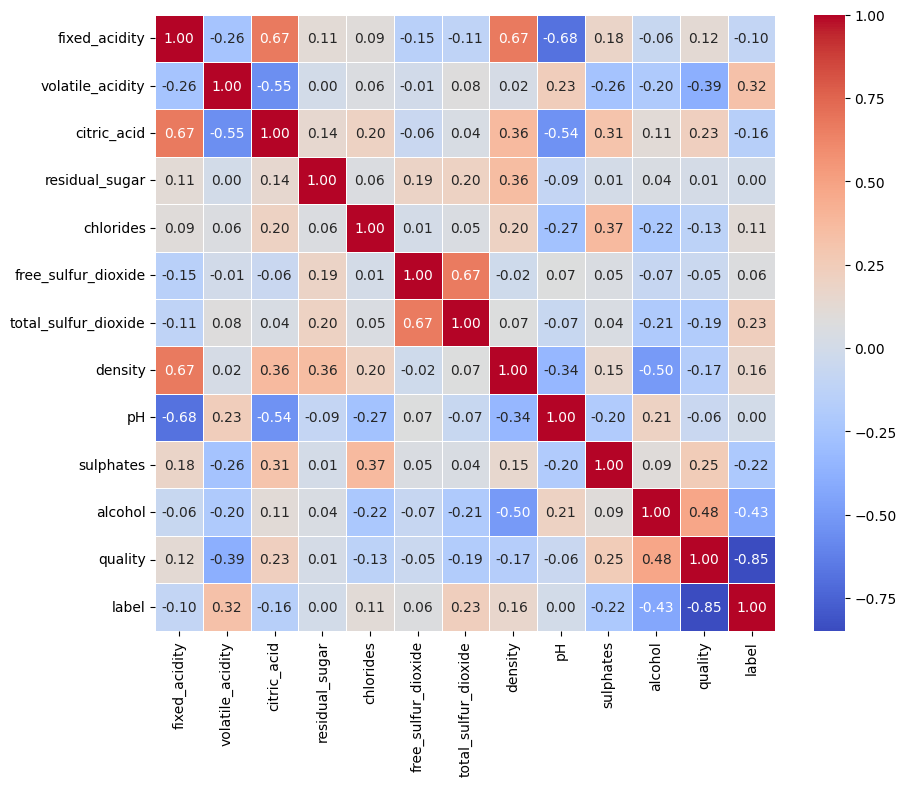

In [ ]:
correlation_matrix = res_df_red.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

We decided to go with two features that have a positive correlation (sulphates and alcohol) and one which has a negative correlation (volatile acidity). The idea behind this is to capture different aspects of the relationship between features and the target variables. By including features with both positive and negative correlations, we can potentially create a more comprehensive model that accounts for various influences on the outcome.

Positive correlations suggest that as one feature increases, the other tends to increase as well, while negative correlations indicate that as one feature increases, the other tends to decrease. This approach provides a more nuanced understanding of the relationships at play in the data.

We possibly try to avoid strong inter corelation between features



<ipython-input-14-831e5182e554>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = res_df_white.corr()


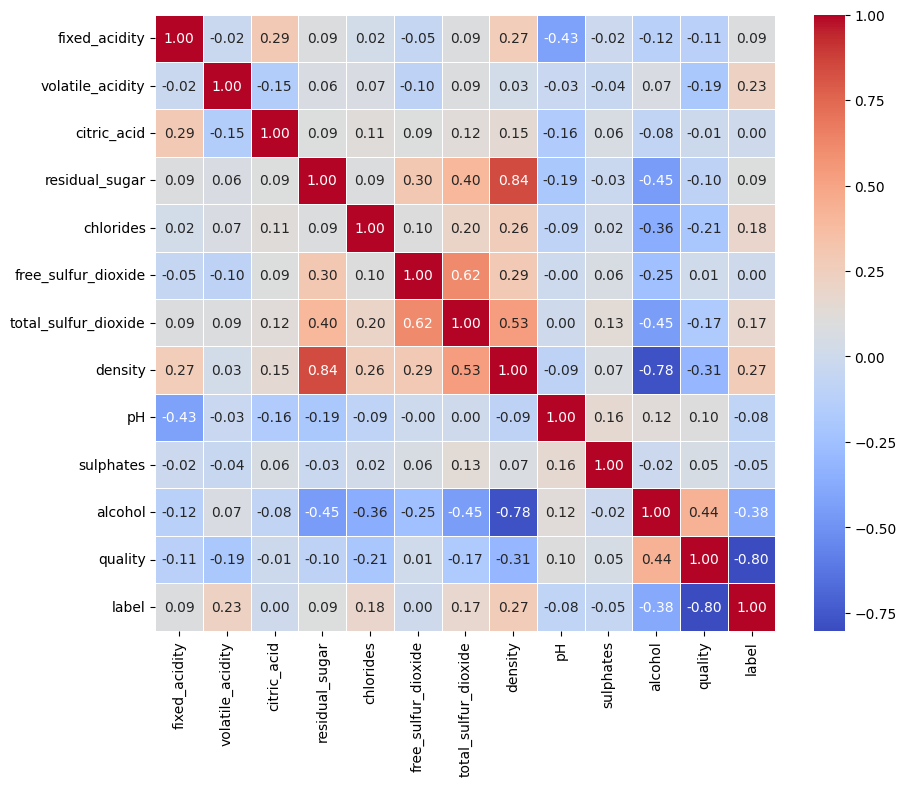

In [ ]:
correlation_matrix = res_df_white.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

For the white wines, we will consider alcohol , volatile_actidity , density as primary features. Alcohol has strong postive corelation and the latter two have relatively strong negative correlation.

Can take chlorides and citric_acid into account as well.

In [ ]:
res_df_red1 = res_df_red[['sulphates', 'volatile_acidity', 'alcohol', 'label']]
res_df_white1 = res_df_white[['density', 'volatile_acidity', 'alcohol', 'label']]

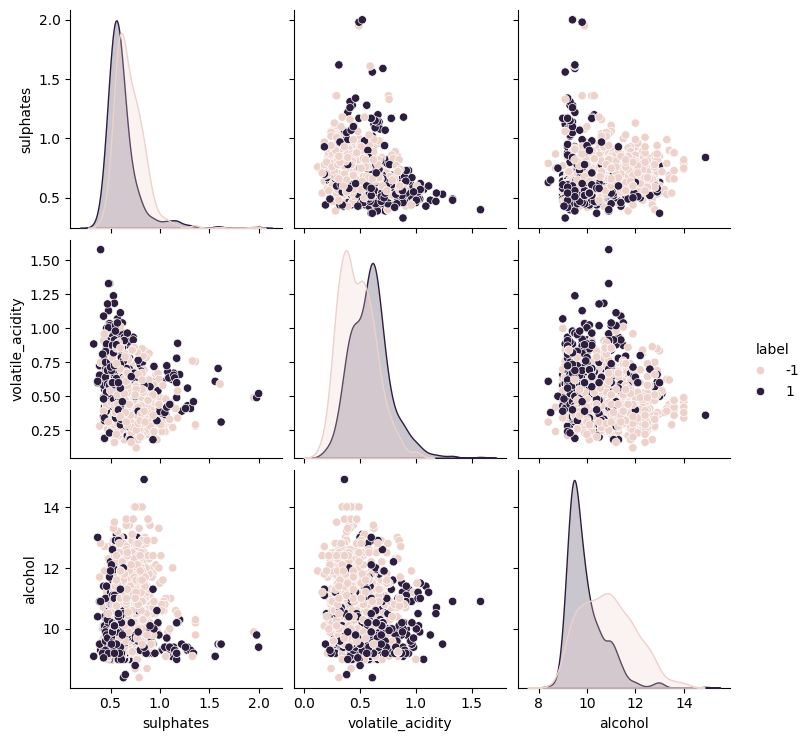

In [ ]:
sns.pairplot(res_df_red1, hue="label")
plt.show()

From the pairplot, it is evident that good quality red wine tends to have lower volatile_acidity, higher sulphates and higher alcohol contents as compared to low quality wines.

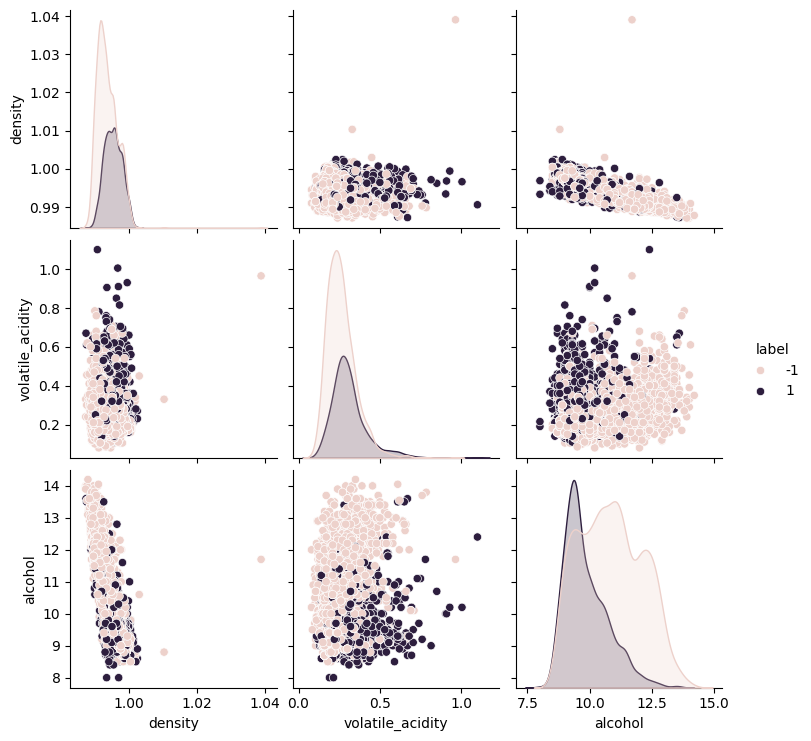

In [ ]:
sns.pairplot(res_df_white1, hue="label")
plt.show()

Also, from the pairplot, it is evident that good quality white wine tends to have a lower density, volatile_acidity and higher alcohol contents as compared to low quality wines.

Generally, it is evident that alcohol content contributes greatly to the quality of any kind of wine (be it white or red)

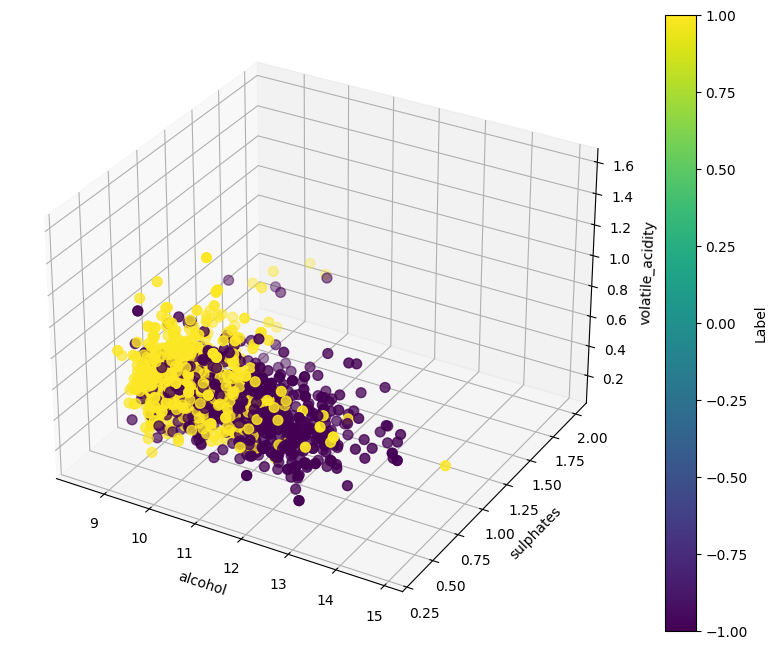

In [ ]:
df_red = res_df_red
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_red['alcohol'], df_red['sulphates'], df_red['volatile_acidity'], c=df_red['label'], cmap='viridis', s=50)
cbar = plt.colorbar(scatter)
cbar.set_label('Label')
ax.set_xlabel('alcohol')
ax.set_ylabel('sulphates')
ax.set_zlabel('volatile_acidity')
plt.show()

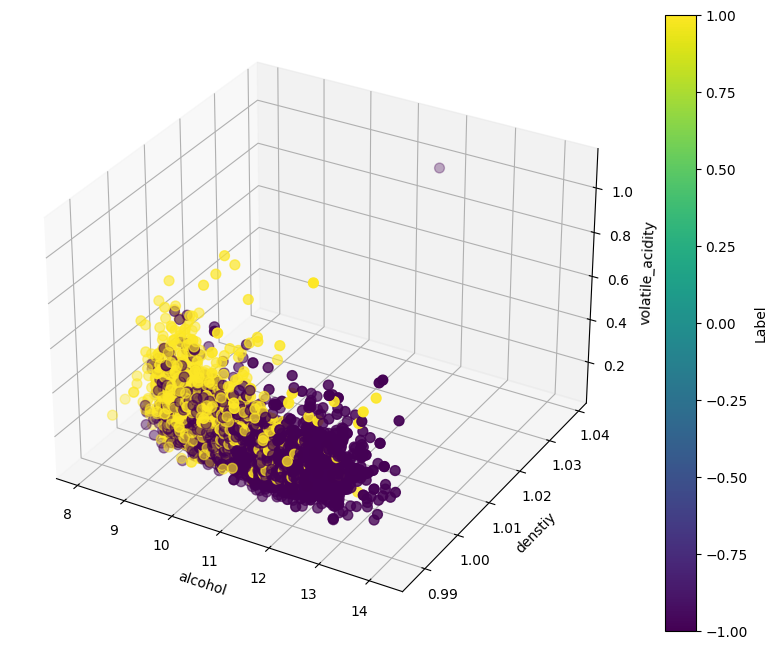

In [ ]:
# for white wine.

df_white = res_df_white
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_white['alcohol'], df_white['density'], df_white['volatile_acidity'], c=df_white['label'], cmap='viridis', s=50)
cbar = plt.colorbar(scatter)
cbar.set_label('Label')
ax.set_xlabel('alcohol')
ax.set_ylabel('denstiy')
ax.set_zlabel('volatile_acidity')
plt.show()

We will be working with red win samples, the clases are well balanced, more or less

Checking just for primary features, we see that data is not linearly separable which is true for most real world data.

We know our data is non linearly separable and currently we don't want to go deep into the kernel tricks but rather try applying the concept of soft margins in svm.

# Implementing SVM Model

We use soft margin support vector machines to allow some misclaffication with penalties to deal our non linear data

## Our primal optimization problem will be defined as

$$ \min _{\vec{W},b} \frac{1}{2} ||\vec{W}||^2 + C\sum _i \xi _i $$

The first term is the width of the street and second term is the penalty for misclassifcation with is regularised with param C. The regularization parameter C controls the trade-off between achieving a wide margin and minimizing the classification error.


### subject to constraints

\begin{equation}
y_i (\mathbf{W} \cdot \mathbf{X}_i + b) \geq 1 - \xi_i \quad \text{and} \quad \xi_i \geq 0
\end{equation}



### if
\begin{equation}
y_i (\mathbf{W} \cdot \mathbf{X}_i + b) \geq 1 \quad \text {then}  
 \quad \xi_i = 0
\end{equation}

### else if

\begin{equation}
y_i (\mathbf{W} \cdot \mathbf{X}_i + b) < 1 \quad \text {then}  
 \quad \xi_i = 1-  y_i (\mathbf{W} \cdot \mathbf{X}_i + b)
\end{equation}

### the equivalent hinge loss function will be defined as
$$ \min_{\vec{W}, b} \left( \frac{1}{2} \|\vec{W}\|^2 + C \sum_i \max \left(0, 1 - y_i (\mathbf{W} \cdot \mathbf{X}_i + b) \right) \right) $$


### hinge loss function

\begin{equation}
L_{\text{hinge}} (y, \hat{y}) = \max(0, 1 - y\hat{y})
\end{equation}




Using Stochastic Gradient Descent we can find the best parameters w and b.


internet - :
Regarding subgradients, in optimization, a subgradient generalizes the derivative to functions which are not differentiable at all points. The hinge loss function used in SVMs is not differentiable at all points (specifically, it’s not differentiable at the point where the function transitions from 0 to a linear function). Therefore, we use the concept of a subgradient when computing the gradient for the hinge loss function.

### Writing the SVM class

### Initialization:

First, we create a class SVM and initialize it with default values for C (regularization parameter), number of epochs, and learning rate.
Initialize the weight vector w and the bias term b.

\

### Hingeloss:

We calculate the hinge loss, which is a type of loss function used in SVM.
Compute the width term, constraint term, and the overall loss function based on the input weight vector, bias, input features (X), and target labels (Y).

\
$$
\text{Width term: } 0.5 \times \sum_{i=1}^{n} w_i^2
$$

\
$$
\text{Constraint term: } Y \times (X \cdot w^T + b)
$$

\
$$
\text{Hinge loss: } L(w, b) = \text{width} + C \times \text{mean}(\max(0, 1 - \text{constraint term}))
$$

\

### Sub-gradient:
The subgradient calculations in the context of the Support Vector Machine (SVM) algorithm:

1. If $t_i > 1$ (where $t_i$ represents the margin for the $i$-th sample), then the subgradient with respect to $w$ is $w$. This condition corresponds to samples that are correctly classified and lie outside the margin, and the subgradient ensures that the weights are updated in the direction that minimizes the hinge loss function.

2. If $t_i \leq 1$, then the subgradient with respect to $w$ is $w - c \cdot Y_j \cdot X_i$, where $c$ is the regularization parameter, $Y_j$ is the label of the $j$-th sample, and $X_i$ is the feature vector of the $i$-th sample. This condition corresponds to samples that are misclassified or lie within or on the margin, and the subgradient guides the update of the weights in a way that moves them closer to correctly classifying these samples.

\
These subgradient calculations are fundamental to the SVM optimization process, as they guide the updates of the model parameters in a way that minimizes the hinge loss function and improves the classification performance of the SVM model.

\
### Fit:

Here we fit the SVM model to the input data X and target labels Y using Stochastic Gradient Descent (SGD).
Initialize weights and biases randomly.
Iterate through the specified number of epochs and calculate the hinge loss at each iteration.
Update the weights and biases using gradients calculated from the hinge loss and batch-wise samples.

\
$$
\text{Weight update: } w_{\text{new}} = w_{\text{old}} - \eta \times \nabla L(w, b)
$$

\
$$
\text{Bias update: } b_{\text{new}} = b_{\text{old}} - \eta \times \nabla L(w, b)
$$







\
### Predict:

Predict the class labels for the input data X using the learned weights and biases.
Compute the dot product of input features with the weight vector, add the bias term, and apply the sign function to make predictions.

\
$$
\text{Prediction: } \text{If } X \cdot w^T + b > 0, \text{ then predict class 1; otherwise, predict class -1.}
$$

In [ ]:
class SVM:
    def __init__(self, C=1.0, epochs = 200, learning_rate=0.001):
        # C default regularization
        self.C = C
        self.w = np.random.rand(1, 0)
        self.b = 0
        self.epochs = epochs
        self.learning_rate = learning_rate

    def hingeloss(self, w, b, X, Y):
        # Width term
        width = 0.5 * np.sum(w * w)
        # Constraint term
        c_term = Y * (np.dot(X, w.T) + b)
        # calculating loss
        loss_function = width + self.C * np.mean(np.maximum(0, 1 - c_term))
        return loss_function

    def fit(self, X, Y, batch_size=100, tol=1e-4):
        number_of_features = X.shape[1]
        number_of_samples = X.shape[0]
        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)
        np.random.shuffle(ids)
        w = np.random.rand(1, number_of_features)
        b = 0
        losses = []

        # S tochastic Gradient Descent logic
        for i in range(1, self.epochs):
            l = self.hingeloss(w, b, X, Y)
            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[j] * (np.dot(w, X[x].T) + b)

                        # subgradient w.r.t W is Cyi​Xi​.
                        #  with respect to b the sub gradient is c*y_j
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients
                            # w.r.t w
                            gradw += c * Y[j] * X[j]
                            # w.r.t b
                            gradb += c * Y[j]
                w = w - self.learning_rate * (w - gradw / batch_size)
                b = b + self.learning_rate * gradb

        self.w = w
        self.b = b
        return self.w, self.b, losses


    def plot_loss_history(self, losses):
        plt.plot(losses)
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def predict(self, X):
        prediction = np.dot(X, self.w[0]) + self.b  # w.x + b
        return np.sign(prediction)

Prepare the data for training and testing our SVM model. We select relevant features (sulphates, alcohol, volatile_acidity, density and citric_acid), split the data into training and testing sets, scale the features, and convert the target variable to NumPy arrays for further processing.

In [ ]:
X = df_red[['sulphates', 'alcohol', 'volatile_acidity', 'density', 'citric_acid' ]]
y = df_red['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

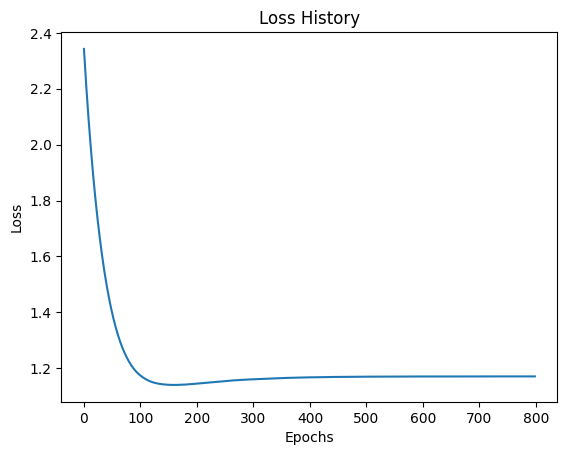

In [ ]:
svm = SVM(C=1.0, epochs=800, learning_rate=0.001)
trained_w, trained_b, losses = svm.fit(X_train_scaled, y_train)
svm.plot_loss_history(losses)

The loss decreases rapidly at the beginning of the training process and then gradually levels off as the number of epochs increases. This indicates that the model is initially making significant improvements in minimizing the loss, but as the training progresses, the rate of improvement slows down, and the loss stabilizes at a lower value. This pattern suggests that the model is learning and adapting to the training data effectively, reaching a point where further training has minimal impact on reducing the loss.

# Experiments


We perform some experiments. One of them is iterating through different values of epochs (e) in the e_list, training our SVM model for each value, making predictions on the test set, and calculating and printing the accuracy for each epoch value.

### Experiment 1: Varying the regularisation parameter C to observe variations in accuracy .

In [ ]:
c_list = [0.001, 0.01, 0.1, 1, 10]
accuracy_list = []
for c in  c_list:
    svm_model = SVM(C=c)
    trained_w, trained_b, losses = svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = np.mean(y_pred== y_test)
    print(f"for c list = {c}, accuracy = {accuracy}")
    accuracy_list.append(accuracy)

for c list = 0.001, accuracy = 0.3375
for c list = 0.01, accuracy = 0.4895833333333333
for c list = 0.1, accuracy = 0.55625
for c list = 1, accuracy = 0.6833333333333333
for c list = 10, accuracy = 0.7104166666666667


Better regularisation could lead to less tolerance for missclassifications using the slack variables.


It's common to perform hyperparameter tuning to find the optimal value for c that gives the best performance on our specific dataset.

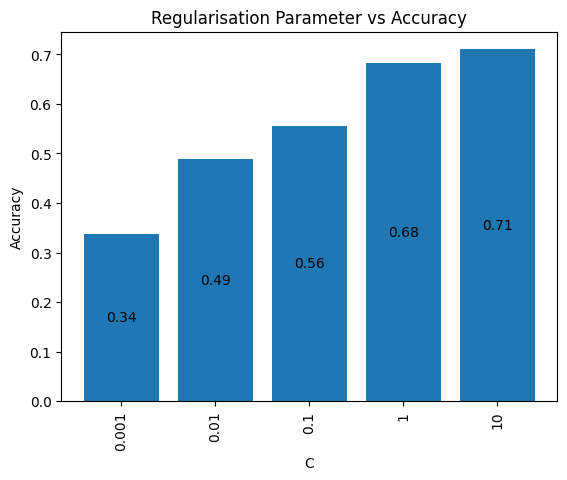

In [ ]:
bars = plt.bar(range(len(c_list)), accuracy_list)

for bar, accuracy in zip(bars, accuracy_list):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{accuracy:.2f}',
             ha='center', va='center', color='black')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Regularisation Parameter vs Accuracy')

plt.xticks(range(len(c_list)), [str(c) for c in c_list], rotation='vertical')
plt.show()

The plotted results demonstrate a discernible trend where increasing the regularization parameter (C) in the SVM model generally corresponds to an improvement in accuracy, peaking at C = 10. This suggests a trade-off between model complexity and performance, with moderate regularization values yielding optimal accuracy.

### Experiment 2: Variation in accuracy due to learning rates at a constant regularization at 1.0

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy_list = []
for lr in learning_rates:
    svm_model = SVM(C=1.0, learning_rate=lr, epochs=100)
    trained_w, trained_b, losses = svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    print(f"For learning rate = {lr}, accuracy = {accuracy}")
    accuracy_list.append(accuracy)

For learning rate = 0.0001, accuracy = 0.5395833333333333
For learning rate = 0.001, accuracy = 0.5625
For learning rate = 0.01, accuracy = 0.7125
For learning rate = 0.1, accuracy = 0.5395833333333333
For learning rate = 1, accuracy = 0.44375


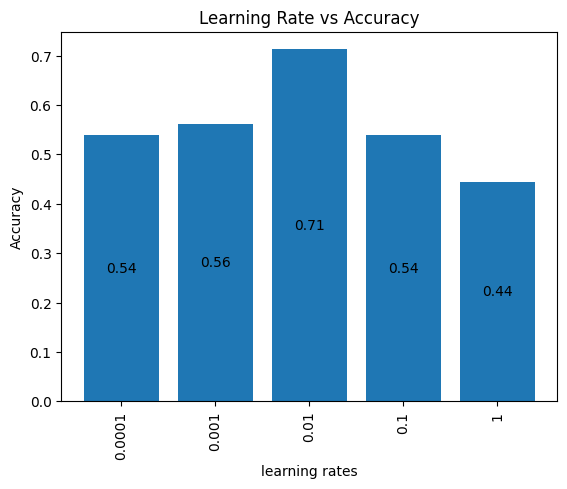

In [ ]:
bars = plt.bar(range(len(learning_rates)), accuracy_list)

for bar, accuracy in zip(bars, accuracy_list):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{accuracy:.2f}',
             ha='center', va='center', color='black')
plt.xlabel('learning rates')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')

plt.xticks(range(len(c_list)), [str(lr) for lr in learning_rates], rotation='vertical')
plt.show()

In the exploration of this experiment, where the regularization parameter is held constant at 1.0, the diverse accuracy outcomes across varying learning rates underscore the intricate relationship between the choice of learning rate and model performance in SVM.

The results reveal a nuanced interplay, showcasing that the model's convergence dynamics significantly influence its accuracy. Notably, an optimal learning rate of 0.01 emerges as the sweet spot, balancing the need for convergence speed with stability.

The experiment highlights the critical importance of tuning of learning rates to achieve a harmonious convergence and optimal accuracy, emphasizing the intricate nature of hyperparameter interactions within the SVM framework.

### Experiment 3: Accuracy with slightly varied feature sets at discrete epochs

In [ ]:
feature_sets = {
    "a" :  ['sulphates', 'alcohol', 'volatile_acidity', 'density', 'citric_acid'] ,
    "b": ['sulphates', 'alcohol', 'volatile_acidity', 'density'] ,
    "c" : ['alcohol', 'volatile_acidity', 'density']
}
accuracy_list_features = []

In [ ]:
for epoch in [50, 200, 500] :
    accuracy_list = []
    for key , features in feature_sets.items():
          X_train_subset = X_train[features]
          X_test_subset = X_test[features]
          scaler = StandardScaler()
          X_train_scaled_subset = scaler.fit_transform(X_train_subset)
          X_test_scaled_subset = scaler.transform(X_test_subset)

          svm_model = SVM(C=1.0, epochs=epoch)
          svm_model.fit(X_train_scaled_subset, y_train)
          y_pred_subset = svm_model.predict(X_test_scaled_subset)

          accuracy_subset = accuracy_score(y_test, y_pred_subset)
          accuracy_list.append(accuracy_subset)
    accuracy_list_features.append(accuracy_list)

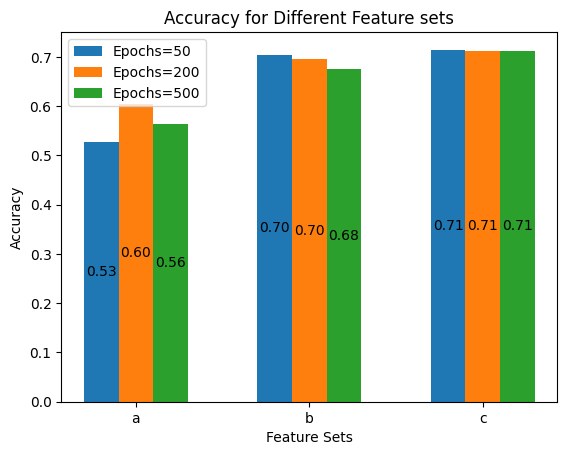

In [ ]:
bar_width = 0.2
epochs = ['50', '200', '500']

positions = np.arange(len(feature_sets))

for i, epoch in enumerate(epochs):
    positions_epoch = [pos + i * bar_width for pos in positions]
    bars = plt.bar(positions_epoch, [accuracy[i] for accuracy in accuracy_list_features], width=bar_width, label=f'Epochs={epoch}')

    for bar, acc in zip(bars, [accuracy[i] for accuracy in accuracy_list_features]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{acc:.2f}',
             ha='center', va='center', color='black')

plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Feature sets')
plt.xticks([pos + (len(epochs) - 1) * bar_width / 2 for pos in positions], feature_sets.keys())
plt.legend()
plt.show()

Our model achieves an accuracy of about 71.7%, meaning it correctly predicts the class of the data about 71.7% of the time. Additionally, the precision of around 67.3% indicates that when the model predicts the positive class, it is correct about 67.3% of the time.

In this experiment, where the SVM model's accuracy is examined with variations in feature sets and discrete epochs, nuanced patterns emerge that shed light on the interplay between feature complexity, training duration, and model performance. Notably, the investigation reveals distinctive sensitivities among different feature sets, with a pronounced impact on accuracy across epochs.

Feature set 'c' stands out for its consistent and high accuracy across all epochs, indicating resilience and robustness with a more straightforward set of features.

Feature set 'b' showcases stability in accuracy for shorter epochs but experiences a mild decline with prolonged training.

Feature set 'a', encompassing a richer set of features, exhibits an initial accuracy lag but demonstrates an ability to improve with increased training epochs.

The observed epoch sensitivity suggests that, for certain feature sets, prolonged training can lead to enhanced accuracy, highlighting the potential for continued learning.

These findings underscore the intricate trade-offs between feature set complexity and training duration, offering valuable insights for selecting optimal configurations based on specific performance objectives.

In summary, this experiment underscores the need for a thoughtful balance between feature richness and training duration, emphasizing the importance of tailored model configurations to achieve optimal SVM performance on the given dataset.

# Comparison with scikit libraries

We know kernel tricks are another approach to handing non-linearly separable data so this could be some futher extension problem

In [ ]:
X = df_red[['sulphates', 'alcohol', 'volatile_acidity', 'density' ,'citric_acid' ]]
y = df_red['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=251524)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kernels = ['rbf', 'poly', 'sigmoid']
for k in kernels :
  svm_model = SVC(kernel=k, gamma='scale', random_state=42)
  svm_model.fit(X_train_scaled, y_train)
  y_pred = svm_model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'with Kernel {k}, the Accuracy is : {accuracy:.2f}')


with Kernel rbf, the Accuracy is : 0.74
with Kernel poly, the Accuracy is : 0.71
with Kernel sigmoid, the Accuracy is : 0.56


 The RBF kernel outperformed the others in terms of accuracy, followed by the polynomial kernel. The sigmoid kernel, however, appears to be less effective for this specific task based on the achieved accuracy of 56%. The choice of the kernel function can significantly impact the SVM model's performance, and further analysis or parameter tuning may be considered to optimize results

In [ ]:
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
print(f'Accuracy score: {a*100}')
print(f'Precision score: {p*100}')
print(f'Recall score: {r*100}')

Confusion Matrix: [[388 366]
 [370 956]]
Accuracy score: 64.61538461538461
Precision score: 72.31467473524961
Recall score: 72.09653092006033


The model achieved a moderate accuracy of 64.62%, with a precision of 72.31% and a recall of 72.10%. These metrics collectively provide a comprehensive understanding of the model's performance in binary classification, considering both positive and negative predictions.

# Potential for extension

#### Kernel Trick Variations
  Expanding the repertoire of kernel tricks employed by the SVM model allows for better accommodation of non-linear relationships in the data. Experimenting with different kernel functions, such as radial basis function (RBF) or polynomial kernels, can enhance the model's capacity to capture intricate patterns and improve classification accuracy on non-linear datasets.

 #### Lagrangian Relaxation:
 Leveraging Lagrange multipliers offers a powerful approach for handling equality and inequality constraints in optimization problems. Integrating Lagrangian relaxation into the SVM model could provide more flexibility in handling complex scenarios and improve the overall robustness of the algorithm.


 #### Principal Component Analysis:

The integration of Principal Component Analysis (PCA) could
be explored to optimize feature selection and dimensionality reduction, enhancing the model’s efficiency and performance.